# Deep learning for distraction detection and Monitoring the driver 
### Python Project: Team-6


* ## **Import Libraries**
Tensorflow, keras and other necessary libraries are imported and initialized
****

In [1]:
import os
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 3 = INFO, WARNING, and ERROR messages are not printed

Using TensorFlow backend.


## Exploratory Data Analysis

* ### Import the dataset
Intializing the dataset and retriving the number of samples and unique classes in the dataset

In [13]:
dataset = pd.read_csv('../input/state-farm-distracted-driver-detection/driver_imgs_list.csv')
print('Number of Samples in trainset : {}'.format(dataset.shape[0]))
print('Number Of districted Classes : {}'.format(len((dataset.classname).unique())))


Number of Samples in trainset : 22424
Number Of districted Classes : 10


,subject,classname,img
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg
22423,p081,c9,img_9684.jpg


* ### Display top five record in csv

In [14]:
dataset.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


* ### Display last five record in csv

In [15]:
dataset.tail()

,subject,classname,img
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg
22423,p081,c9,img_9684.jpg


* ### Overview of Images
Displaying all unique classes image by mapping to define titles of the classes.

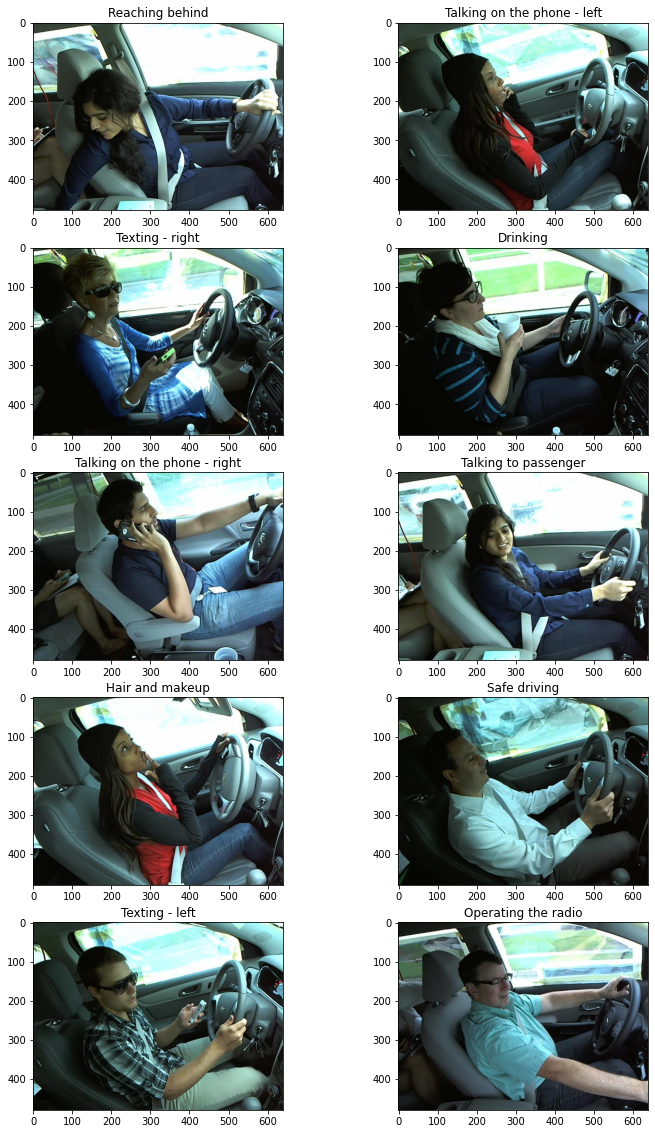

In [9]:

import os
from IPython.display import display, Image
import matplotlib.image as mpimg

activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

plt.figure(figsize = (12, 20))
image_count = 1
BASE_URL = '../input/state-farm-distracted-driver-detection/imgs/train/'
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(5, 2, image_count)
                image_count += 1
                image = mpimg.imread(BASE_URL + directory + '/' + file)
                plt.imshow(image)
                plt.title(activity_map[directory])

* ### Graphical Representation
Plotting number of samples for each class using BarPlot and PieChart

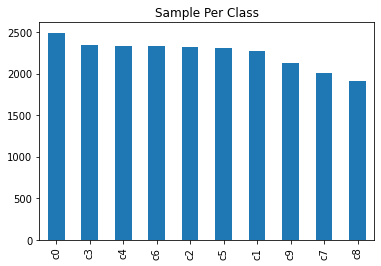

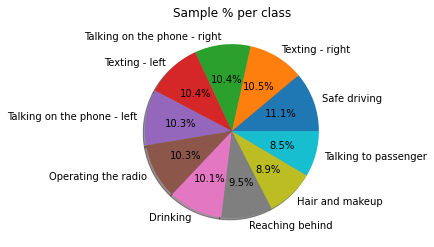

In [18]:
class_freq_count = dataset.classname.value_counts()

class_freq_count.plot(kind='bar', label='index')
plt.title('Sample Per Class');
plt.show()

plt.pie(class_freq_count, autopct='%1.1f%%', shadow=True, labels=activity_map.values())
plt.title('Sample % per class');
plt.show()

* ### Building Model
Developing a model with a total of 3 Convolutional layers, then a Flatten layer and then 3 Dense layers. Also, using optimizer as adam, and loss as categorical_crossentropy.

In [10]:
classifier = Sequential()
classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (240, 240, 3), data_format = 'channels_last'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 238, 238, 128)     3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 119, 119, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 117, 117, 64)      73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            